In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

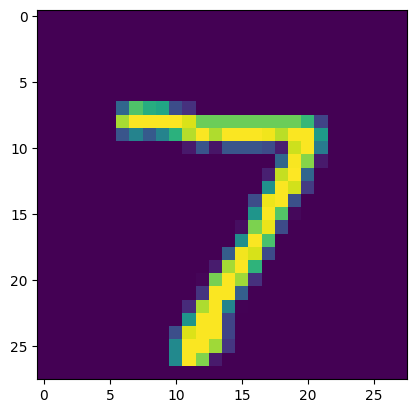

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0])

In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation= 'relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8580 - loss: 0.4960 - val_accuracy: 0.9548 - val_loss: 0.1545
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9622 - loss: 0.1277 - val_accuracy: 0.9661 - val_loss: 0.1148
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9738 - loss: 0.0860 - val_accuracy: 0.9699 - val_loss: 0.1003
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9814 - loss: 0.0624 - val_accuracy: 0.9730 - val_loss: 0.0926
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9869 - loss: 0.0440 - val_accuracy: 0.9743 - val_loss: 0.0897
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9875 - loss: 0.0375 - val_accuracy: 0.9718 - val_loss: 0.1007
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9901 - loss: 0.0281 - val_accuracy: 0.9761 - val_loss: 0.0877
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9916 - loss: 0.0256 

In [18]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [19]:
y_pred = y_prob.argmax(axis=1)

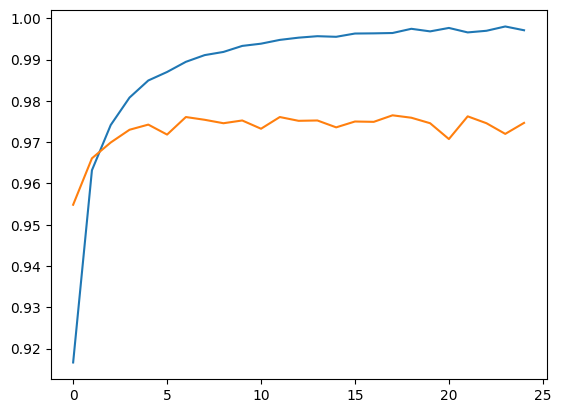

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

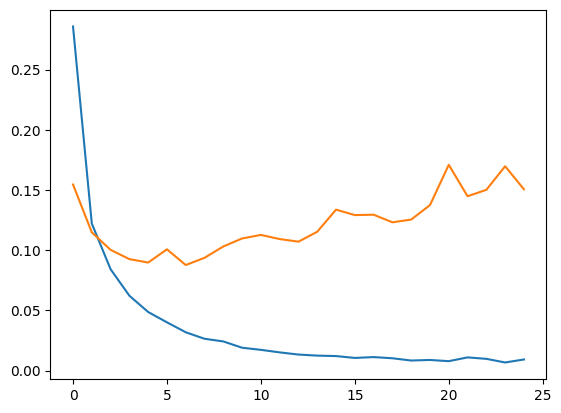

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9773

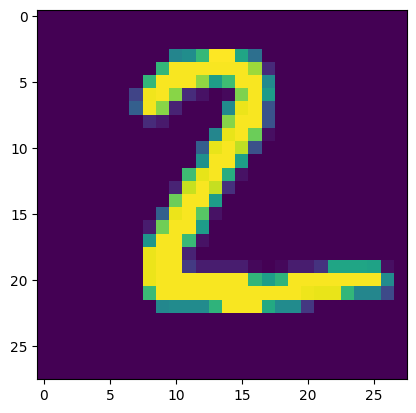

In [25]:
plt.imshow(X_test[1])

In [28]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([2])